In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Pre-processing

In [2]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Creation

In [25]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Dense(64,activation='relu'),
       tf.keras.layers.Dense(32,activation='relu'),
       tf.keras.layers.Dense(16,activation='relu'),
       tf.keras.layers.Dense(1)
])

history = model.compile(optimizer='adam',loss="mean_squared_error")

model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
240/240 [==============================] - 0s 1ms/step - loss: 127482.8672
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 8165.8877
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 2004.8047
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 768.8690
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 349.7771
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 176.2790
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 102.2461
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 67.4057
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 50.0328
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 40.0447
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 33.9246
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - los

In [26]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.72 431.23]
 [457.46 460.01]
 [462.69 461.14]
 ...
 [469.2  473.26]
 [442.11 438.  ]
 [461.54 463.28]]


In [27]:
print(y_pred)
yyy = y_pred.flatten()
print(yyy)
MSE=tf.keras.losses.MSE(
    y_test, yyy
)
print(MSE)

[[434.72]
 [457.46]
 [462.69]
 ...
 [469.2 ]
 [442.11]
 [461.54]]
[434.72 457.46 462.69 ... 469.2  442.11 461.54]
tf.Tensor(16.296242, shape=(), dtype=float32)


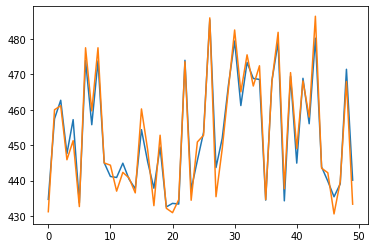

In [28]:
plt.plot(y_pred[0:50])
plt.plot(y_test[0:50])